<a href="https://colab.research.google.com/github/greygrease/Project-RCT-Abstract-Skimmer/blob/main/RCT_Abstract_Skimmer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SkimLit

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 7.84 MiB/s, done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
!ls '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign'

dev.txt  test.txt  train.txt


In [ ]:
data_dir = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [ ]:
import os
filenames = [data_dir + '/' + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign//dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign//train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign//test.txt']

## Preprocess data

In [ ]:
def get_lines(filename):

  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir + 'train.txt')
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

In [ ]:
def preprocess_text_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstract_lines = ""
  abstract_samples = []


  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)

    else:
      abstract_lines += line

  return abstract_samples

In [ ]:
train_samples = preprocess_text_with_line_numbers(data_dir + 'train.txt')
val_samples = preprocess_text_with_line_numbers(data_dir + 'dev.txt')
test_samples = preprocess_text_with_line_numbers(data_dir + 'test.txt')

In [ ]:
len(train_samples), len(test_samples), len(test_samples)

(180040, 30135, 30135)

In [ ]:
train_samples[:10]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<Axes: ylabel='Frequency'>

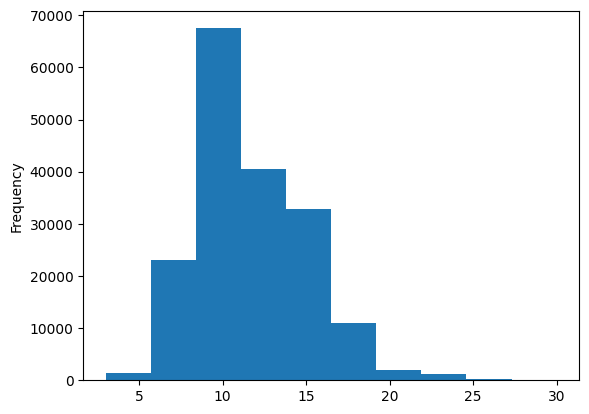

In [ ]:
# Check the len of
train_df.total_lines.plot.hist()

## Get lists of sents

In [ ]:
train_sentences = train_df['text'].tolist()
val_sentences = val_df['text'].tolist()
test_sentences = test_df['text'].tolist()

len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Make Numeric Labels

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse = False)
train_labels_one_hot = one_hot.fit_transform(train_df['target'].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot.fit_transform(val_df['target'].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot.fit_transform(test_df['target'].to_numpy().reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Extract labels ("target" columns) and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
# Get class names an

num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

# Modelling

## Model 0 : Baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('tf-idf' , TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(X = train_sentences,
           y = train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(val_sentences, val_labels_encoded)

0.7218323844829869

In [ ]:
# Make predictions using our baseline model
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-10 02:18:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-10 02:18:23 (83.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 2: Conv1D

### Preparing text into num

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

In [ ]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <BarContainer object of 20 artists>)

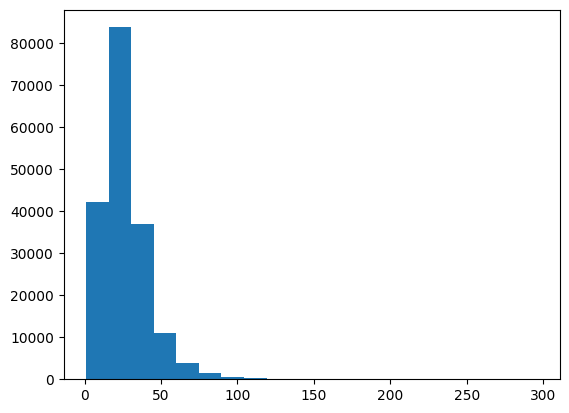

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins = 20)

In [ ]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [ ]:
# Create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# From paper
max_tokens =  68000
text_vectorizer = TextVectorization(max_tokens = max_tokens,
                                    output_sequence_length = output_seq_len)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
text_vectorizer(['This is a good book'])

<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[   23,    20,     8,   745, 13473,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])>

In [ ]:
# How many words in our training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"),
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
# Embedding
token_embed = layers.Embedding(input_dim = len(rct_20k_text_vocab),
                                output_dim = 128,
                                mask_zero = True,
                                input_length = output_seq_len)

In [ ]:
print(text_vectorizer(['this is not a drill']))
print(token_embed(text_vectorizer(['this is not a drill'])))

tf.Tensor(
[[   23    20    31     8 26770     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 55), dtype=int64)
tf.Tensor(
[[[ 0.00815197  0.02083143  0.03362998 ...  0.03697972  0.01821936
    0.00041331]
  [-0.02304663 -0.02789624  0.03839592 ... -0.04515803  0.01373205
    0.00177972]
  [ 0.02527395  0.00921563 -0.03195703 ... -0.00986235  0.02113834
    0.02153179]
  ...
  [ 0.00221277  0.02303482  0.03951323 ...  0.0401456   0.00424259
   -0.02713715]
  [ 0.00221277  0.02303482  0.03951323 ...  0.0401456   0.00424259
   -0.02713715]
  [ 0.00221277  0.02303482  0.03951323 ...  0.0401456   0.00424259
   -0.02713715]]], shape=(1, 55, 128), dtype=float32)


## Create TF Dataset

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))

In [ ]:
train_dataset, test_dataset, val_dataset

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>)

In [ ]:
train_labels_one_hot.shape

(180040, 5)

## Prefetching

In [ ]:
train_dataset =  train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 1: Conv1D

In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
text_vectors = text_vectorizer(inputs)
token_embedding = token_embed(text_vectors)
x = layers.Conv1D(63, kernel_size  = 5, padding = 'same', activation = 'relu')(token_embedding)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation = 'softmax')(x)
model_1 = tf.keras.Model(inputs, outputs, name = 'model_1_con1d')

model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_1.summary()

Model: "model_1_con1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 128)           8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 63)            40383     
                                                                 
 global_average_pooling1d (G  (None, 63)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)               

In [ ]:
model_1.fit(train_dataset,
            steps_per_epoch = int(0.1 * len(train_dataset)),
            epochs = 3,
            validation_data = val_dataset,
            validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 46s 63ms/step - loss: 0.9118 - accuracy: 0.6416 - val_loss: 0.6762 - val_accuracy: 0.7457
Epoch 2/3
562/562 [==============================] - 8s 15ms/step - loss: 0.6481 - accuracy: 0.7625 - val_loss: 0.6214 - val_accuracy: 0.7763
Epoch 3/3
562/562 [==============================] - 5s 9ms/step - loss: 0.6109 - accuracy: 0.7791 - val_loss: 0.5922 - val_accuracy: 0.7896


In [ ]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5924 - accuracy: 0.7887


[0.592357873916626, 0.7887263298034668]

In [ ]:
model_1_pred_probs = model_1.predict(val_dataset)
model_1_pred_probs, model_1_pred_probs.shape

945/945 [==============================] - 2s 2ms/step


(array([[4.7266969e-01, 1.5339367e-01, 5.4191060e-02, 2.8256458e-01,
         3.7180990e-02],
        [4.6594810e-01, 2.7285743e-01, 1.3800791e-02, 2.3751713e-01,
         9.8765176e-03],
        [1.6647170e-01, 5.3917482e-03, 2.4251370e-03, 8.2564741e-01,
         6.4045475e-05],
        ...,
        [6.5463892e-06, 5.5466132e-04, 6.1323965e-04, 4.6195178e-06,
         9.9882096e-01],
        [5.1069535e-02, 5.1009607e-01, 8.5480183e-02, 6.0823318e-02,
         2.9253089e-01],
        [1.3628106e-01, 7.4892837e-01, 4.5814954e-02, 3.6966633e-02,
         3.2008972e-02]], dtype=float32),
 (30212, 5))

In [ ]:
model_1_preds = tf.argmax(model_1_pred_probs, axis = 1)

In [ ]:
model_1_results = calculate_results(val_labels_encoded,
                                    model_1_preds)
model_1_results

{'accuracy': 78.87263339070569,
 'precision': 0.7855216291286444,
 'recall': 0.7887263339070568,
 'f1': 0.7862150348418275}

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 2 : TensorFlow Hub pretrianed

In [ ]:
import tensorflow_hub as hub

In [ ]:
hub_embed = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                           name = 'USE',
                           trainable = False)

In [ ]:
import random
random_train_sentence = random.choice(train_sentences)
print(random_train_sentence)
use_embed_seq = hub_embed([random_train_sentence])
print(use_embed_seq[0][:30])

bivariate , stratified , and multivariable analyses were used to explore the associations between ga growth and independent variables .
tf.Tensor(
[ 0.06989775 -0.0454855  -0.04591534  0.00981793 -0.05252236 -0.03913274
 -0.02690701 -0.05790674 -0.02684337  0.07070684  0.0506709   0.0445003
  0.0180322   0.04117519 -0.07167601 -0.05745029  0.03213247  0.0470589
  0.06187901 -0.01825941  0.04556235  0.05579734 -0.00961361  0.04254214
  0.04242693  0.05699082  0.00248405  0.06944805  0.01000161 -0.04303245], shape=(30,), dtype=float32)


In [ ]:
inputs = layers.Input(shape =[], dtype = tf.string)
hub_layer = hub_embed(inputs)
x = layers.Dense(128, activation = 'relu')(hub_layer)
outputs = layers.Dense(5, activation = 'softmax')(x)

model_2 = tf.keras.Model(inputs = inputs,
                         outputs = outputs,
                         name = 'model_2_use')


model_2.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
model_2.summary()

Model: "model_2_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(train_dataset,
                        epochs = 3,
                        steps_per_epoch = int(0.1 * len(train_dataset)),
                        validation_data = val_dataset,
                        validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 11s 14ms/step - loss: 0.9158 - accuracy: 0.6507 - val_loss: 0.7945 - val_accuracy: 0.6908
Epoch 2/3
562/562 [==============================] - 8s 15ms/step - loss: 0.7680 - accuracy: 0.7018 - val_loss: 0.7543 - val_accuracy: 0.7041
Epoch 3/3
562/562 [==============================] - 9s 16ms/step - loss: 0.7519 - accuracy: 0.7135 - val_loss: 0.7395 - val_accuracy: 0.7138


In [ ]:
model_2.evaluate(val_dataset)

945/945 [==============================] - 11s 12ms/step - loss: 0.7409 - accuracy: 0.7132


[0.7408872842788696, 0.713193416595459]

In [ ]:
model_2_pred_probs = model_2.predict(val_dataset)
model_2_preds = tf.argmax(model_2_pred_probs , axis = 1)
model_2_preds

945/945 [==============================] - 11s 11ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_2_results = calculate_results(val_labels_encoded,
                                    model_2_preds)
model_2_results

{'accuracy': 71.31934330729511,
 'precision': 0.7134214868964979,
 'recall': 0.7131934330729511,
 'f1': 0.7101823999391229}

## Model 3 Character Embedding

In [ ]:
def split_char(text):
  return " ".join(list(text))

In [ ]:
split_char(random_train_sentence)

'b i v a r i a t e   ,   s t r a t i f i e d   ,   a n d   m u l t i v a r i a b l e   a n a l y s e s   w e r e   u s e d   t o   e x p l o r e   t h e   a s s o c i a t i o n s   b e t w e e n   g a   g r o w t h   a n d   i n d e p e n d e n t   v a r i a b l e s   .'

In [ ]:
train_chars = [split_char(sentence) for sentence in train_sentences]
test_chars = [split_char(sentence) for sentence in test_sentences]
val_chars = [split_char(sentence) for sentence in val_sentences]

In [ ]:
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
# avereage char len

char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

(array([1.24736e+05, 5.17520e+04, 3.22000e+03, 2.71000e+02, 4.60000e+01,
        1.00000e+01, 4.00000e+00, 1.00000e+00]),
 array([1.000000e+00, 1.741250e+02, 3.472500e+02, 5.203750e+02,
        6.935000e+02, 8.666250e+02, 1.039750e+03, 1.212875e+03,
        1.386000e+03]),
 <BarContainer object of 8 artists>)

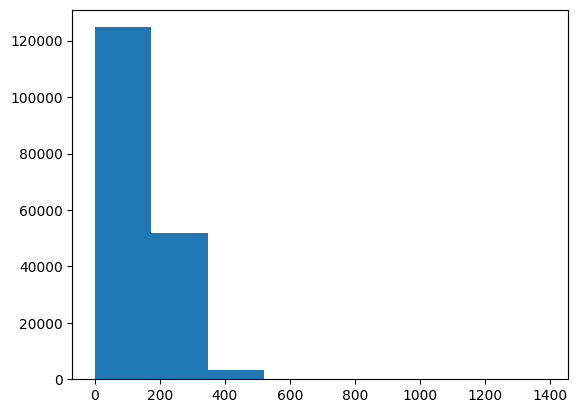

In [ ]:
plt.hist(char_lens, bins = 8)

In [ ]:
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [ ]:
# Get all keyboard char

import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [ ]:
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
                                    output_sequence_length = output_seq_char_len,
                                    name = 'char_vectorizer',)
                                    # standardize = None)

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
print(f'Num of diff char in char vocab: {len(char_vocab)}')
print(f'Most common: {char_vocab[:5]}')
print(f'Least common: {char_vocab[-5:]}')

Num of diff char in char vocab: 28
Most common: ['', '[UNK]', 'e', 't', 'i']
Least common: ['k', 'x', 'z', 'q', 'j']


In [ ]:
char_vocab

['',
 '[UNK]',
 'e',
 't',
 'i',
 'a',
 'n',
 'o',
 'r',
 's',
 'd',
 'c',
 'l',
 'h',
 'p',
 'm',
 'u',
 'f',
 'g',
 'y',
 'w',
 'v',
 'b',
 'k',
 'x',
 'z',
 'q',
 'j']

In [ ]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
w e   w i l l   c o m b i n e   t h e s e   i n t e r v i e w s   w i t h   a   r a n d o m i s e d   t r i a l   a d d r e s s i n g   t h e   o p t i m a l   a m o u n t   o f   i n f o r m a t i o n   r e g a r d i n g   t h e   i n t e r v e n t i o n s   a n d   o u t c o m e s   r e q u i r e d   t o   e l i c i t   p r e f e r e n c e s   .

Length of chars: 151

Vectorized chars:
[[20  2 20  4 12 12 11  7 15 22  4  6  2  3 13  2  9  2  4  6  3  2  8 21
   4  2 20  9 20  4  3 13  5  8  5  6 10  7 15  4  9  2 10  3  8  4  5 12
   5 10 10  8  2  9  9  4  6 18  3 13  2  7 14  3  4 15  5 12  5 15  7 16
   6  3  7 17  4  6 17  7  8 15  5  3  4  7  6  8  2 18  5  8 10  4  6 18
   3 13  2  4  6  3  2  8 21  2  6  3  4  7  6  9  5  6 10  7 16  3 11  7
  15  2  9  8  2 26 16  4  8  2 10  3  7  2 12  4 11  4  3 14  8  2 17  2
   8  2  6 11  2  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 

In [ ]:
len(char_vocab)

28

In [ ]:
## Creating a char lvl embedding
char_embed = layers.Embedding(input_dim = len(char_vocab),
                              output_dim = 25,
                              mask_zero = True)

In [ ]:
# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
w e   w i l l   c o m b i n e   t h e s e   i n t e r v i e w s   w i t h   a   r a n d o m i s e d   t r i a l   a d d r e s s i n g   t h e   o p t i m a l   a m o u n t   o f   i n f o r m a t i o n   r e g a r d i n g   t h e   i n t e r v e n t i o n s   a n d   o u t c o m e s   r e q u i r e d   t o   e l i c i t   p r e f e r e n c e s   .

Embedded chars (after vectorization and embedding):
[[[ 0.03823717  0.0182918  -0.0204106  ... -0.00197369  0.02747883
    0.0325564 ]
  [-0.03721976 -0.02239844  0.01131016 ... -0.01502838  0.02781979
   -0.03657497]
  [ 0.03823717  0.0182918  -0.0204106  ... -0.00197369  0.02747883
    0.0325564 ]
  ...
  [-0.02767446  0.04380312  0.02625016 ...  0.04953417  0.00871231
   -0.00846547]
  [-0.02767446  0.04380312  0.02625016 ...  0.04953417  0.00871231
   -0.00846547]
  [-0.02767446  0.04380312  0.02625016 ...  0.04953417  0.00871231
   -0.00846547]]]

Character embedding shape: (1, 290, 2

### Modeeling char model

In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
char_vector = char_vectorizer(inputs)
char_embedding = char_embed(char_vector)

x = layers.Conv1D(64, kernel_size = 5, padding = 'same', activation = 'relu')(char_embedding)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(5, activation = 'softmax')(x)

model_3 = tf.keras.Model(inputs = inputs,
                         outputs = outputs,
                         name = 'model_3_Conv1d')


model_3.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
model_3.summary()

Model: "model_3_Conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 embedding_1 (Embedding)     (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5)              

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch = int(0.1 * len(train_char_dataset)),
                              validation_data = val_char_dataset,
                              epochs = 3,
                              validation_steps = int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 5s 6ms/step - loss: 1.2711 - accuracy: 0.4866 - val_loss: 1.0308 - val_accuracy: 0.5984
Epoch 2/3
562/562 [==============================] - 4s 7ms/step - loss: 0.9929 - accuracy: 0.6062 - val_loss: 0.9114 - val_accuracy: 0.6513
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9094 - accuracy: 0.6421 - val_loss: 0.8441 - val_accuracy: 0.6792


In [ ]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_preds = tf.argmax(model_3_pred_probs, axis = 1)
model_3_preds

945/945 [==============================] - 3s 3ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 1, ..., 4, 2, 0])>

In [ ]:
model_3_results = calculate_results(val_labels_encoded,
                                    model_3_preds)
model_3_results

{'accuracy': 66.62915397855157,
 'precision': 0.6551385130935906,
 'recall': 0.6662915397855157,
 'f1': 0.657912014008875}

## Model 4 : Combining tokem embedding

In [ ]:
token_inputs = layers.Input(shape = [], dtype = tf.string)
token_embedding = hub_embed(token_inputs)
token_output = layers.Dense(128, activation = 'relu')(token_embedding)
token_model = tf.keras.Model(inputs= token_inputs,
                             outputs = token_output)

char_inputs = layers.Input(shape = (1,), dtype = tf.string)
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bilstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs = char_inputs,
                          outputs = char_bilstm)

token_char_concat = layers.Concatenate(name = 'token_char_hybrid')([token_model.output,
                                                                   char_model.output])

combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation = 'relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation = 'softmax')(final_dropout)

model_4 = tf.keras.Model(inputs = [token_model.input, char_model.input],
                         outputs = output_layer,
                         name = 'model_4_tok_char')

In [ ]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = hub_embed(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [ ]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 USE (KerasLayer)               (None, 512)          256797824   [

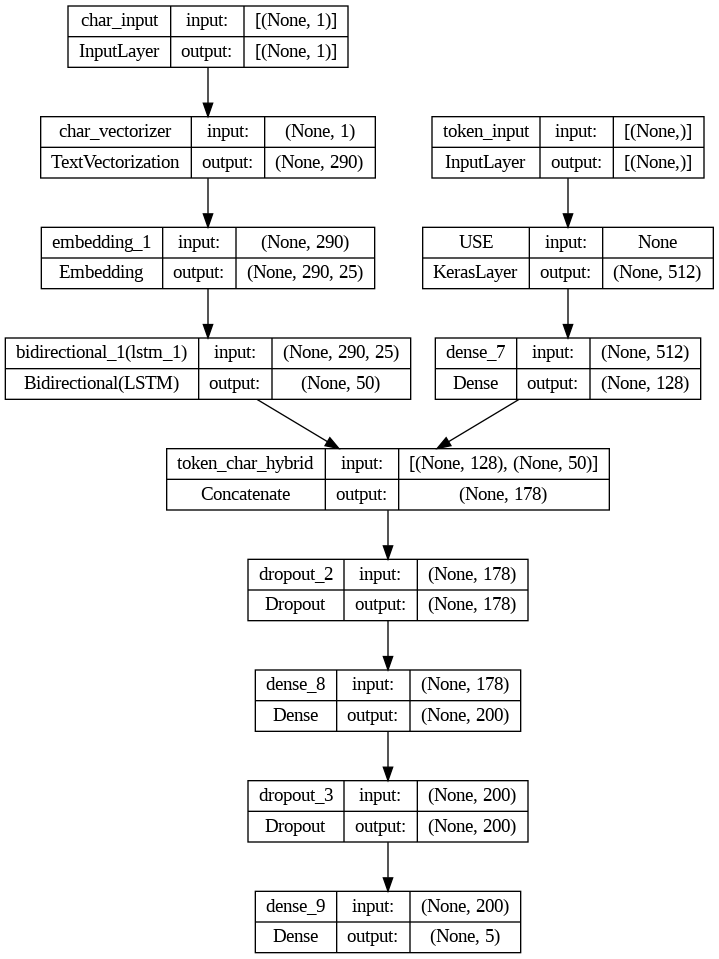

In [ ]:
from keras.utils import plot_model
plot_model(model_4, show_shapes = True)

In [ ]:
# Compile token char mode

model_4.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

### Combingin token and char dataset

In [ ]:
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_token_char_label = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset = tf.data.Dataset.zip((train_token_char_data, train_token_char_label)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_token_char_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_token_char_label = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_token_char_data, val_token_char_label)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
len(train_sentences), len(train_chars), len(train_labels_one_hot)

(180040, 180040, 180040)

In [ ]:
len(train_char_token_dataset) * 32

180064

In [ ]:
# Fitting the model

history_4 = model_4.fit(train_char_token_dataset,
                        steps_per_epoch = int(0.1 * len(train_token_char_data)),
                        epochs = 3,
                        validation_data = val_char_token_dataset,
                        validation_steps = int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
 5627/18004 [========>.....................] - ETA: 10:02 - loss: 0.6754 - accuracy: 0.7464

18004/18004 [==============================] - 275s 15ms/step - loss: 0.6754 - accuracy: 0.7464 - val_loss: 0.5945 - val_accuracy: 0.7756


In [ ]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 21s 22ms/step - loss: 0.5929 - accuracy: 0.7735


[0.5929463505744934, 0.773467481136322]

In [ ]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_preds = tf.argmax(model_4_pred_probs, axis = 1)

945/945 [==============================] - 31s 33ms/step


In [ ]:
model_4_results = calculate_results(val_labels_encoded,
                            model_4_preds)
model_4_results

{'accuracy': 77.34674963590626,
 'precision': 0.7726528395775236,
 'recall': 0.7734674963590626,
 'f1': 0.769861528497423}

## Model 5 : Tribrid Model

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


## Create positional embedding

In [ ]:
train_df['line_number'].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<Axes: >

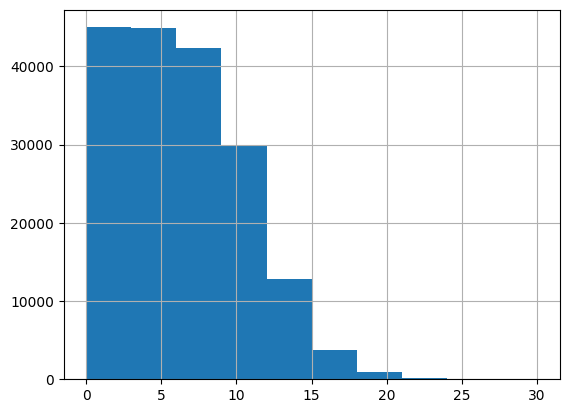

In [ ]:
train_df.line_number.hist()

In [ ]:
np.percentile(train_df['line_number'], 95)

13.0

In [ ]:
# Use tf to one hot encode line number

train_line_nums_one_hot = tf.one_hot(train_df['line_number'].to_numpy(), depth = 15)
val_line_nums_one_hot = tf.one_hot(val_df['line_number'].to_numpy(), depth  = 15)
train_line_nums_one_hot[:20]

<tf.Tensor: shape=(20, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
train_df['total_lines'].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

<Axes: >

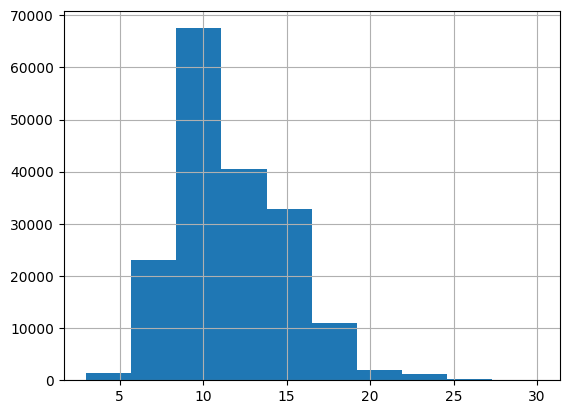

In [ ]:
train_df.total_lines.hist()

In [ ]:
np.percentile(train_df.total_lines, 95)

18.0

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df['total_lines'], depth = 20)
val_total_lines_one_hot = tf.one_hot(val_df['total_lines'], depth = 20)
train_total_lines_one_hot[:3]

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Use TF to create one hot encoded to our total l

In [ ]:
len(train_total_lines_one_hot)

180040

In [ ]:
train_combined = tf.data.Dataset.from_tensor_slices((train_line_nums_one_hot,
                                                     train_total_lines_one_hot,
                                                     train_sentences,
                                                     train_chars))
train_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_combined_dataset = tf.data.Dataset.zip((train_combined, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
train_combined_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
val_combined = tf.data.Dataset.from_tensor_slices((val_line_nums_one_hot, val_total_lines_one_hot, val_sentences, val_chars))
val_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_combined_dataset = tf.data.Dataset.zip((val_combined, val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
val_combined_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

### Creating the model

In [ ]:
# Token
token_inputs = layers.Input(shape = [], dtype = 'string', name = 'token_inputs')
token_embeddings = hub_embed(token_inputs)
token_output = layers.Dense(128, activation = 'relu')(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_output, name = 'token_model')

# Char
char_inputs = layers.Input(shape = (1,), dtype = tf.string, name = 'char_input')
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs = char_inputs,
                            outputs = char_bi_lstm)

# Line nums
line_inputs = layers.Input(shape = (15,), dtype = tf.float32, name = 'line_input')
line_dense = layers.Dense(32, activation = 'relu')(line_inputs)
line_model = tf.keras.Model(inputs = line_inputs,
                            outputs = line_dense)

# Total lines
total_lines_input = layers.Input(shape = (20,), dtype = tf.float32, name = 'float_input')
total_dense = layers.Dense(32, activation = 'relu')(total_lines_input)
total_lines_model = tf.keras.Model(total_lines_input, total_dense)

# Combine token and char embeddings
combined_embedding = layers.Concatenate(name = 'char_token_hybrid')([token_model.output, char_model.output])
z = layers.Dense(256, activation = 'relu')(combined_embedding)
z = layers.Dropout(0.5)(z)

# Tribrid
tribrid_embedding = layers.Concatenate(name = 'char_token_positional_embed')([line_model.output,
                                                                              total_lines_model.output,
                                                                              z])

# Output
output_layer = layers.Dense(5, activation = 'softmax', name = 'output_layer')(tribrid_embedding)

# Model
model_5 = tf.keras.Model(inputs = [line_model.input,
                                   total_lines_model.input,
                                   token_model.input,
                                   char_model.input],
                         outputs = output_layer)

In [ ]:
model_5.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 USE (KerasLayer)               (None, 512)          256797824   ['token_inputs[0][0]']    

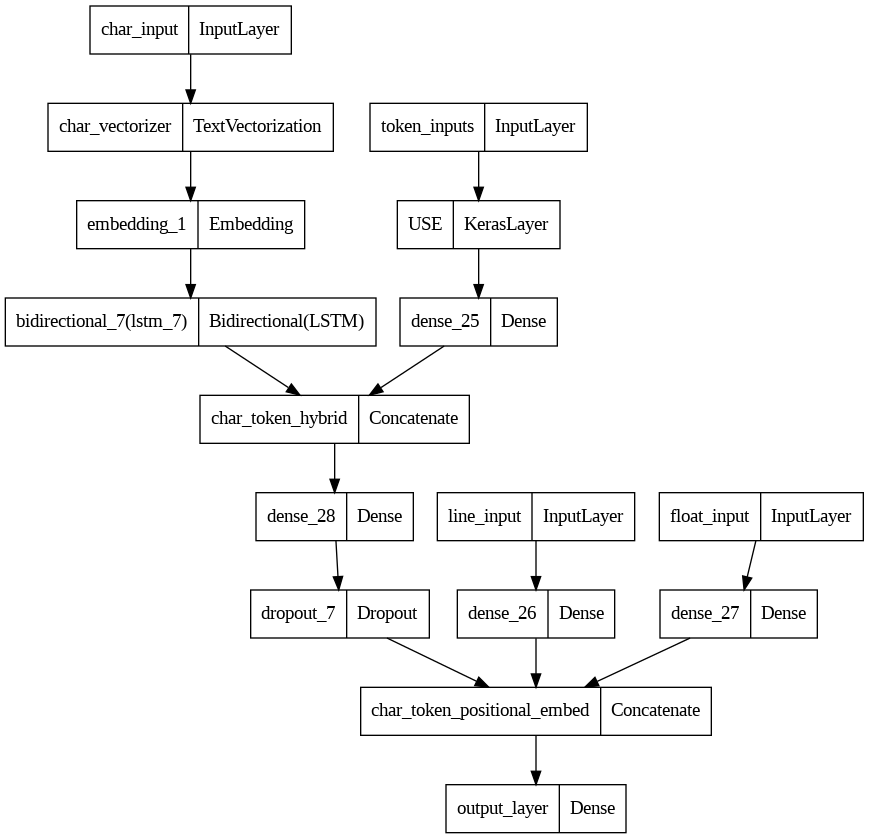

In [ ]:
plot_model(model_5)

Label smoothing: If our model get too confident on a single class it may get on that class and not consider other classes

In [ ]:
model_5.compile(loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2),
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
history_5 = model_5.fit(train_combined_dataset,
                        epochs = 3,
                        steps_per_epoch = int(0.1 * len(train_combined_dataset)),
                        validation_data = val_combined_dataset,
                        validation_steps = int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 42s 56ms/step - loss: 1.0953 - accuracy: 0.7207 - val_loss: 0.9812 - val_accuracy: 0.8059
Epoch 2/3
562/562 [==============================] - 34s 61ms/step - loss: 0.9642 - accuracy: 0.8157 - val_loss: 0.9461 - val_accuracy: 0.8318
Epoch 3/3
562/562 [==============================] - 44s 79ms/step - loss: 0.9487 - accuracy: 0.8260 - val_loss: 0.9391 - val_accuracy: 0.8354


In [ ]:
model_5_pred_probs = model_5.predict(val_combined_dataset)
model_5_pred_probs

945/945 [==============================] - 33s 31ms/step


array([[0.48443168, 0.09961896, 0.010263  , 0.3897046 , 0.01598172],
       [0.5287018 , 0.09279475, 0.05270832, 0.31267112, 0.01312406],
       [0.251298  , 0.11636105, 0.13067858, 0.4336967 , 0.06796566],
       ...,
       [0.03713773, 0.10797904, 0.04023764, 0.03432876, 0.7803168 ],
       [0.03282639, 0.30053467, 0.07845569, 0.02780055, 0.56038266],
       [0.18229458, 0.62008953, 0.09945386, 0.04064175, 0.05752024]],
      dtype=float32)

In [ ]:
model_5_preds = tf.argmax(model_5_pred_probs, axis = 1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
model_5_results= calculate_results(val_labels_encoded,
                                   model_5_preds)
model_5_results

{'accuracy': 83.38077585065537,
 'precision': 0.832885111941588,
 'recall': 0.8338077585065536,
 'f1': 0.832929829408428}

## Compare model results

In [ ]:
all_model_results = pd.DataFrame({'model_0_baseline' : baseline_results,
                                  'model_1_token' : model_1_results,
                                  'model_2_hub': model_2_results,
                                  'model_3_char': model_3_results,
                                  'model_4_hybrid': model_4_results,
                                  'model_5_tribrid': model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
model_0_baseline,72.183238,0.718647,0.721832,0.698925
model_1_token,78.872633,0.785522,0.788726,0.786215
model_2_hub,71.319343,0.713421,0.713193,0.710182
model_3_char,66.629154,0.655139,0.666292,0.657912
model_4_hybrid,77.346750,0.772653,0.773467,0.769862
model_5_tribrid,83.380776,0.832885,0.833808,0.832930


In [ ]:
all_model_results['accuracy'] = all_model_results['accuracy']/100

<Axes: >

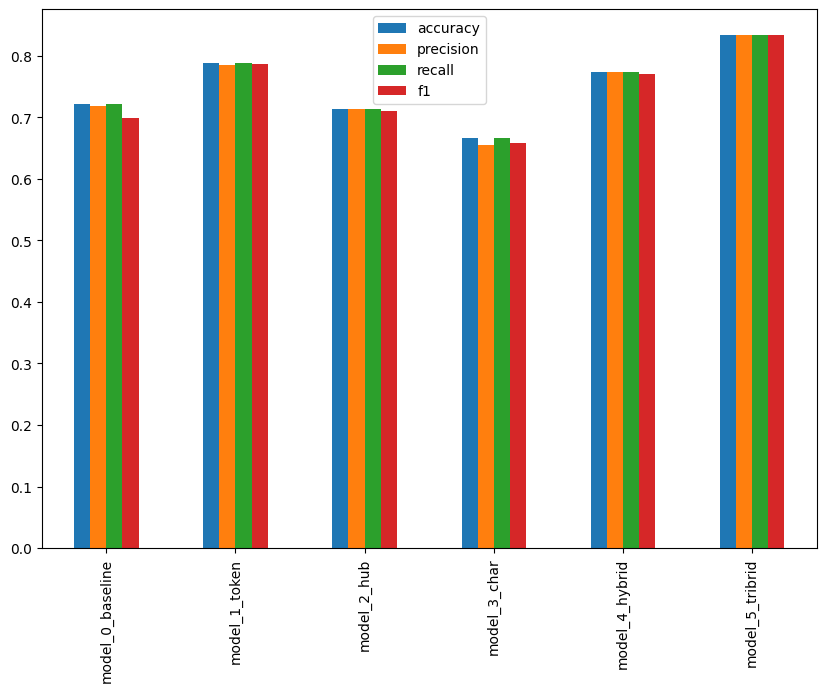

In [ ]:
all_model_results.plot(kind = 'bar', figsize = (10, 7))

<Axes: >

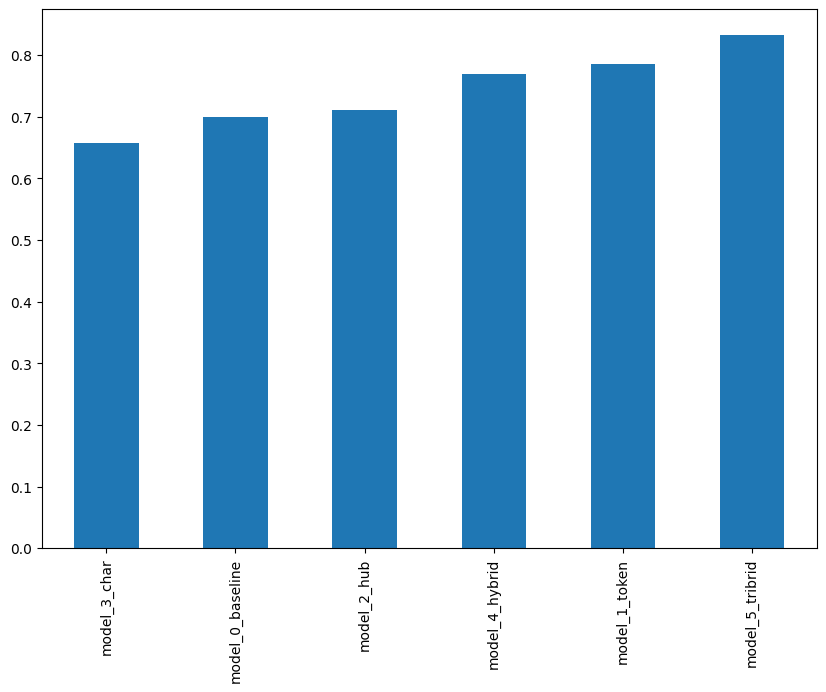

In [ ]:
all_model_results.sort_values('f1', ascending = True)['f1'].plot(kind = 'bar', figsize = (10, 7))

In [ ]:
model_5.save('skimlit')

In [ ]:
loaded_model = tf.keras.models.load_model('skimlit')

In [ ]:
loded_model = model_5.predict(val_combined_dataset)

945/945 [==============================] - 30s 31ms/step


In [ ]:
loaded_preds = tf.argmax(loded_model, axis = 1)

In [ ]:
calculate_results(val_labels_encoded,
                  loaded_preds)

{'accuracy': 83.38077585065537,
 'precision': 0.832885111941588,
 'recall': 0.8338077585065536,
 'f1': 0.832929829408428}

## Predicting random abstaracts

In [ ]:
import json
# Download and open example abstracts (copy and pasted from PubMed)
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

--2023-07-10 03:53:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘skimlit_example_abstracts.json’

skimlit_example_abs 100%[===================>]   6.58K  --.-KB/s    in 0s      

2023-07-10 03:53:47 (76.4 MB/s) - ‘skimlit_example_abstracts.json’ saved [6737/6737]



[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [ ]:
# See what our example abstracts look like
abstracts = pd.DataFrame(example_abstracts)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


In [ ]:
# Create sentencizer - Source: https://spacy.io/usage/linguistic-features#sbd
from spacy.lang.en import English
nlp = English() # setup English sentence parser

# New version of spaCy
sentencizer = nlp.add_pipe("sentencizer") # create sentence splitting pipeline object

# Old version of spaCy
# sentencizer = nlp.create_pipe("sentencizer") # create sentence splitting pipeline object
# nlp.add_pipe(sentencizer) # add sentence splitting pipeline object to sentence parser

# Create "doc" of parsed sequences, change index for a different abstract
doc = nlp(example_abstracts[0]["abstract"])
abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [ ]:
# Get total number of lines
total_lines_in_sample = len(abstract_lines)

# Go through each line in abstract and create a list of dictionaries containing features for each line
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

[{'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'line_number': 0,
  'total_lines': 7},
 {'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'line_number': 1,
  'total_lines': 7},
 {'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'line_number': 2,
  'total_lines': 7},
 {'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'line_number': 3,
  'total_lines': 7},
 {'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'line_number': 4,
  'total_lines': 7},
 {'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'line_number': 5,
  'total_lines': 7},
 {'text'

In [ ]:
# Get all line_number values from sample abstract
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [ ]:
# Get all total_lines values from sample abstract
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Split abstract lines into characters
abstract_chars = [split_char(sentence) for sentence in abstract_lines]
abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [ ]:
test_abstract_pred_probs = loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

1/1 [==============================] - 5s 5s/step


array([[0.2538929 , 0.11285669, 0.01353265, 0.5939167 , 0.02580111],
       [0.07860515, 0.02989319, 0.687224  , 0.1178213 , 0.08645643],
       [0.1091359 , 0.06969888, 0.5590597 , 0.1646434 , 0.09746208],
       [0.08739935, 0.12839796, 0.5651523 , 0.07959533, 0.1394551 ],
       [0.04741422, 0.10511138, 0.38464534, 0.05282132, 0.41000772],
       [0.02905644, 0.12737374, 0.5116771 , 0.04783175, 0.28406096],
       [0.02298513, 0.11949836, 0.08641052, 0.02936578, 0.74174017],
       [0.01831426, 0.11049146, 0.19520062, 0.03164015, 0.6443535 ]],
      dtype=float32)

In [ ]:
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([3, 2, 2, 2, 4, 2, 4, 4])>

In [ ]:
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [ ]:
# Visualize abstract lines and predicted sequence labels
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

OBJECTIVE: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.
